# Nuages de mots

## Imports et stopwords

In [18]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fatig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "etc", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "autre", "jusqu", "rue", "rossel", "ans", "tél", "bruxelles", "dem", "janvier", "février",
       "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre",
       "décembre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche" ]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [33]:
# Choisir une année
year = 1961

In [34]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f] 
#AVEC str(year) on s'assure de prendre la bonne année
len(txts)

100

In [35]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [36]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [37]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"7 S.A-* A. LE som JEUDI 5 JANVIER 1961 16. PAGES LE SOIR Quelle que soit l'heure à laquelle vous achetez LE SOIR, réclamez au vendeur LA DERNIERE EDITION PARUE dSTOS 7 ÉDITIONS F : PniîitMr» Dtuxlèm* "

In [38]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [39]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"7 S.A-* A. LE som JEUDI 5 JANVIER 1961 16. PAGES LE SOIR Quelle que soit l'heure à laquelle vous achetez LE SOIR, réclamez au vendeur LA DERNIERE EDITION PARUE dSTOS 7 ÉDITIONS F : PniîitMr» Dtuxlèm* Trol»lim« Quatrième RdlUon nuit 0 Q Dcm. Mit, nuit A Matin LE WEEK-END SPORTIF VU PAR HORN *34, ti&faLàkVu i S.M. fooTBALL Ae A&{u>4€. 4m. ce. A°vuv- cksL 582991 18.500 fr. Tr. belle Vauxhall 56. cont. tech. 60.000 km. Soir •*4.53.09. 285152 Z ISARD 56 12.000 fr. T. 74.16.42. 216022Z 8tud. Champion "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [40]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw] #2 caractères et plus petits = parasites
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [41]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1961_clean.txt!'

In [42]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOM PAGES SOIR QUELLE HEURE LAQUELLE ACHETEZ SOIR RÉCLAMEZ VENDEUR DERNIERE EDITION PARUE DSTOS ÉDITIONS PNIÎITMR DTUXLÈM TROL LIM QUATRIÈME RDLUON NUIT DCM MIT NUIT MATIN WEEK END SPORTIF HORN FALÀKVU FOOTBALL VUV CKSL BELLE VAUXHALL CONT TECH SOIR ISARD CHAMPION AUR KTALSIÉ PTES CONT TECHN FCRÇUNPT TLMBR COMPRIT SUÈDE MLDL DAUPHINE ABARTH CRÉ LUXE OPEL KAPITAN CRÉD CORBEAU ANRLLA CRÈME PROP KMS CRÉD POSA REINE PORSCHE DECAPOTABLE GEORG MERCURY INTER PTES NOM ACCÈS NEUVE MAIL OPEL ITEKORD CRÉD '

## Nuage de mots

### Afficher les termes les plus fréquents


In [43]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('PRIX', 608), ('APP', 534), ('TRÈS', 466), ('VAN', 462), ('BRUX', 457), ('ECRIRE', 383), ('SOIR', 374), ('ANVERS', 366), ('BON', 358), ('AGENCE', 352), ('COURS', 351), ('PLACE', 341), ('ECR', 330), ('PART', 325), ('GRAND', 309), ('MOIS', 309), ('DEMANDE', 296), ('FRANCS', 294), ('BONNE', 290), ('MAISON', 288)]


### Créer, stocker et afficher le nuage de mots

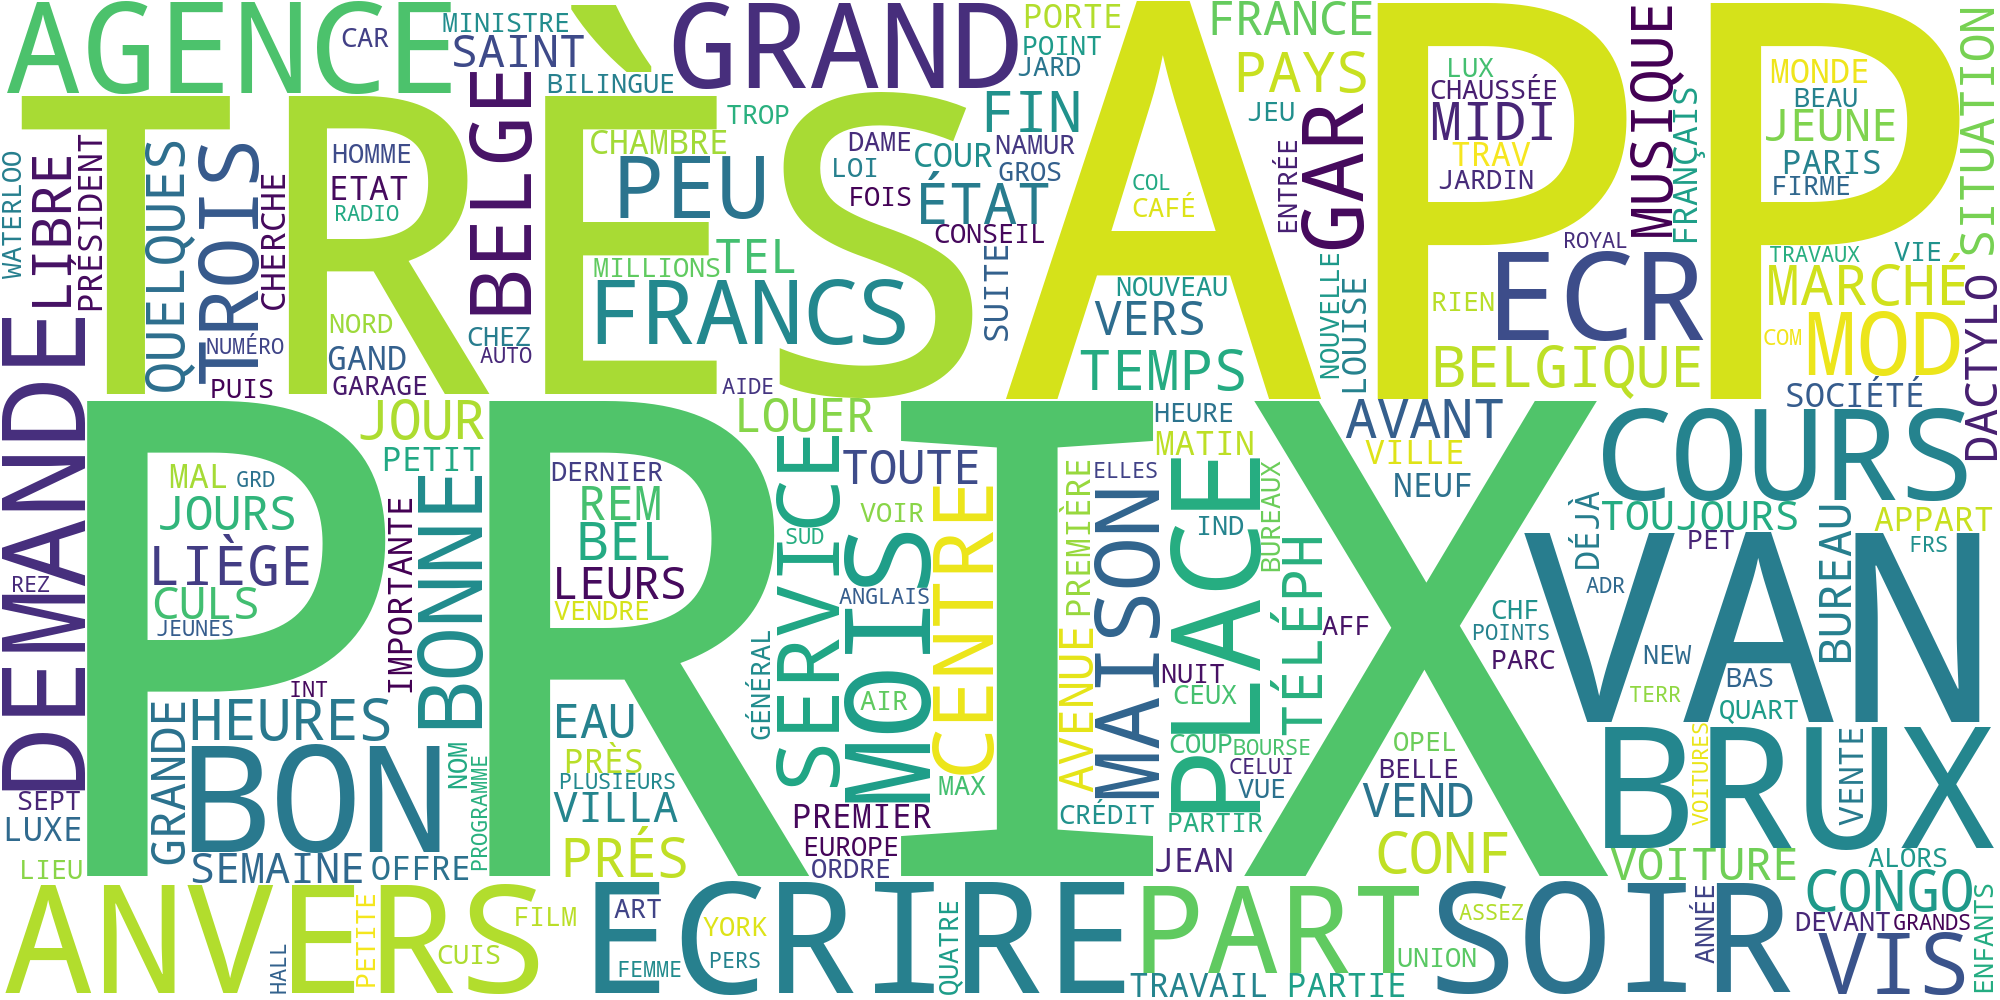

In [44]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))